🧪 Generating synthetic market data...
✅ 'simulated_assets.png' saved successfully.


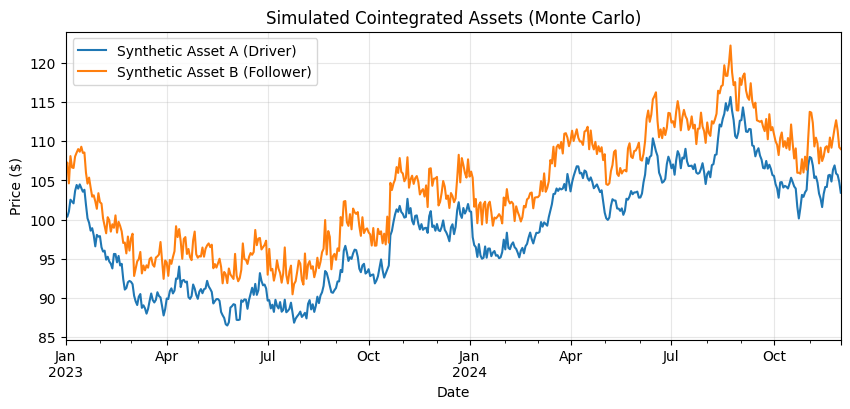


🧮 Running Cointegration Test...
---------------- RESULT ----------------
P-Value: 0.0000000000
🎉 SUCCESS! The series are cointegrated.
✅ 'pairs_trading_signals.png' saved successfully.


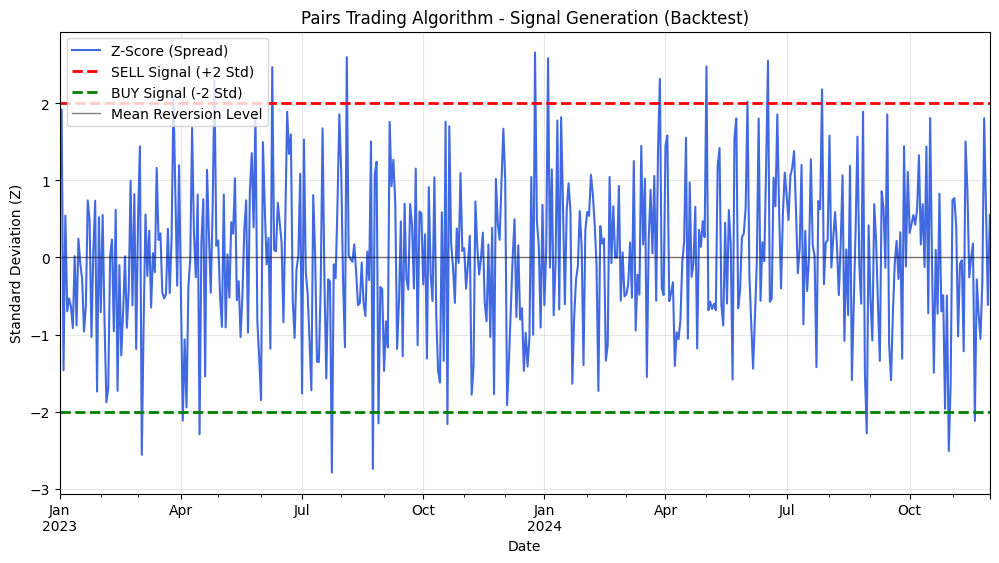

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

print("🧪 Generating synthetic market data...")

np.random.seed(42)

n = 500 # Days
dates = pd.date_range(start='2023-01-01', periods=n, freq='B')

noise_x = np.random.normal(0, 1, n)
stock_x = pd.Series(np.cumsum(noise_x) + 100, index=dates)

noise_y = np.random.normal(0, 1, n)
stock_y = stock_x + 5 + noise_y 
stock_y.index = dates

plt.figure(figsize=(10, 4))
stock_x.plot(label='Synthetic Asset A (Driver)')
stock_y.plot(label='Synthetic Asset B (Follower)')
plt.title("Simulated Cointegrated Assets (Monte Carlo)")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('simulated_assets.png')
print("✅ 'simulated_assets.png' saved successfully.")
plt.show()

print("\n🧮 Running Cointegration Test...")

score, p_value, _ = coint(stock_x, stock_y)

print(f"---------------- RESULT ----------------")
print(f"P-Value: {p_value:.10f}")

if p_value < 0.05:
    print("🎉 SUCCESS! The series are cointegrated.")
    
    spread = stock_y - stock_x
    
    z_score = (spread - spread.mean()) / spread.std()
    
    plt.figure(figsize=(12, 6))
    
    z_score.plot(label='Z-Score (Spread)', color='royalblue')
    
    plt.axhline(2.0, color='red', linestyle='--', linewidth=2, label='SELL Signal (+2 Std)')
    plt.axhline(-2.0, color='green', linestyle='--', linewidth=2, label='BUY Signal (-2 Std)')
    plt.axhline(0, color='black', linewidth=1, alpha=0.5, label='Mean Reversion Level')
    
    plt.title("Pairs Trading Algorithm - Signal Generation (Backtest)")
    plt.ylabel("Standard Deviation (Z)")
    plt.xlabel("Date")
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.savefig('pairs_trading_signals.png')
    print("✅ 'pairs_trading_signals.png' saved successfully.")
    
    plt.show()
else:
    print("❌ Simulation failed. Check parameters.")